In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

In [15]:
from diffprivlib.models import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

C:\Users\Anupama\anaconda3\lib\site-packages\diffprivlib\models\naive_bayes.py:99: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


GaussianNB(accountant=BudgetAccountant(spent_budget=[(1.0, 0)]),
           bounds=(array([4.3, 2. , 1. , 0.1]), array([7.7, 4.4, 6.9, 2.5])))

In [16]:
clf.predict(X_test)

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0])

In [17]:
print("Test accuracy: %f" % clf.score(X_test, y_test))

Test accuracy: 0.533333


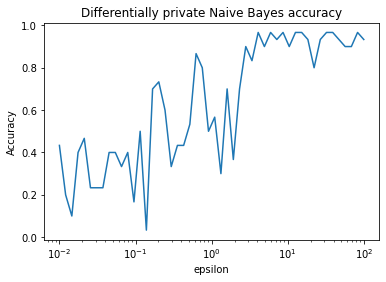

In [18]:
import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-2, 2, 50)
bounds = ([4.3, 2.0, 1.1, 0.1], [7.9, 4.4, 6.9, 2.5])
accuracy = list()

for epsilon in epsilons:
    clf = GaussianNB(bounds=bounds, epsilon=epsilon)
    clf.fit(X_train, y_train)
    
    accuracy.append(clf.score(X_test, y_test))

plt.semilogx(epsilons, accuracy)
plt.title("Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()